In [1]:
import time
start_time = time.time()
import os
import numpy as np
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras import backend as K
from keras.optimizers import adam
from keras import models
import cv2
#import dlib
import pandas as pd
import matplotlib.pyplot as plt
import sys
import time 
#import progressbar
#from tqdm.notebook import tqdm_notebook
from sklearn import svm, datasets
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, AveragePooling2D, Conv2D, Flatten

Using TensorFlow backend.


In [2]:
# extracting dataframe of cartoon dataset
eye_color = pd.read_csv('D:/ELEC0134 Applied Machine Learning Systems/assignment/dataset_AMLS_20-21/cartoon_set/labels.csv', sep = '\t')
eye_color = eye_color.drop(columns = [eye_color.columns[0]]).drop(columns = [eye_color.columns[2]])
eye_color['eye_color'] = eye_color['eye_color'].apply(str)
#eye_color

In [3]:
img = ('D:/ELEC0134 Applied Machine Learning Systems/assignment/dataset_AMLS_20-21/cartoon_set/img')
# splitting training and testing dataset
training, testing = np.split(eye_color.sample(frac=1), [int(0.9*len(eye_color)),]) #splitting at n-array
print(training.shape, testing.shape)

(9000, 2) (1000, 2)


In [4]:
# set up data generator and further split training dataset for validation set
data_generator = ImageDataGenerator(
    rescale = 1./255.,
    validation_split = 0.2,
    horizontal_flip=True,
    vertical_flip=True   
)

# Get batches of training dataset from the dataframe
print("Training Dataset Preparation: ")
train_generator = data_generator.flow_from_dataframe(
        dataframe = training, directory = img ,
        x_col = "file_name", y_col = "eye_color",
        class_mode = 'categorical', target_size = (128,128),
        batch_size = 128, subset = 'training') 
   
# Get batches of validation dataset from the dataframe
print("\nValidation Dataset Preparation: ")
validation_generator = data_generator.flow_from_dataframe(
        dataframe = training, directory = img ,
        x_col = "file_name", y_col = "eye_color",
        class_mode = 'categorical', target_size = (128,128),
        batch_size = 128, subset = 'validation')

Training Dataset Preparation: 
Found 7200 validated image filenames belonging to 5 classes.

Validation Dataset Preparation: 
Found 1800 validated image filenames belonging to 5 classes.


In [5]:
model = Sequential(name = 'Eye Color')

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())



model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=5, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = 'Adam', metrics=['accuracy'])

In [6]:
model.summary()

Model: "Eye Color"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               13824120  
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10

In [7]:
# batch_size = 32
history = model.fit_generator(
                                train_generator,
                                epochs=8,
                                steps_per_epoch=train_generator.samples // train_generator.batch_size, 
                                validation_data=validation_generator,
                                validation_steps=validation_generator.samples // validation_generator.batch_size
                                )

Epoch 1/8
56/56 [==============================] - 194s 3s/step - loss: 1.5496 - accuracy: 0.3835 - val_loss: 0.9449 - val_accuracy: 0.6378
Epoch 2/8
56/56 [==============================] - 172s 3s/step - loss: 0.9290 - accuracy: 0.6264 - val_loss: 0.7438 - val_accuracy: 0.7315
Epoch 3/8
56/56 [==============================] - 179s 3s/step - loss: 0.6513 - accuracy: 0.7855 - val_loss: 0.4616 - val_accuracy: 0.8289
Epoch 4/8
56/56 [==============================] - 195s 3s/step - loss: 0.4521 - accuracy: 0.8290 - val_loss: 0.5809 - val_accuracy: 0.8349
Epoch 5/8
56/56 [==============================] - 189s 3s/step - loss: 0.4105 - accuracy: 0.8349 - val_loss: 0.4437 - val_accuracy: 0.8266
Epoch 6/8
56/56 [==============================] - 191s 3s/step - loss: 0.3801 - accuracy: 0.8361 - val_loss: 0.3422 - val_accuracy: 0.8409
Epoch 7/8
56/56 [==============================] - 193s 3s/step - loss: 0.3574 - accuracy: 0.8466 - val_loss: 0.4300 - val_accuracy: 0.8397
Epoch 8/8
56/56 [===

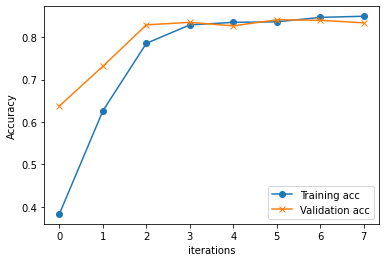

In [8]:
plt.plot(history.history['accuracy'], 'o-', label='Training acc')
plt.plot(history.history['val_accuracy'], 'x-', label='Validation acc')
plt.xlabel('iterations')
plt.ylabel('Accuracy')
plt.legend()

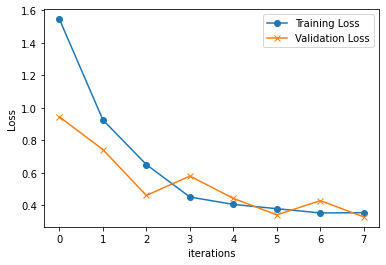

In [9]:
plt.plot(history.history['loss'], 'o-', label='Training Loss')
plt.plot(history.history['val_loss'], 'x-', label='Validation Loss')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()

In [11]:
model.layers

In [13]:
from keras.models import load_model

modelFile = 'eye_color.h5'

model.save(modelFile)

In [14]:
# extracting new test dataset
df2 = pd.read_csv('D:/ELEC0134 Applied Machine Learning Systems/assignment/dataset_AMLS_20-21_test/cartoon_set_test/labels.csv', sep = '\t')
df2 = df2.drop(columns = [df2.columns[0]]).drop(columns = [df2.columns[2]])
df2['eye_color'] = df2['eye_color'].apply(str)
img2 = ('D:/ELEC0134 Applied Machine Learning Systems/assignment/dataset_AMLS_20-21_test/cartoon_set_test/img')

In [20]:
saved_model = load_model(modelFile)
test_generator = data_generator.flow_from_dataframe(
        dataframe = df2, directory = img2,
        x_col = "file_name", y_col = "eye_color",
        batch_size=1,
        class_mode='categorical', target_size=(128, 128),
        shuffle=False)
test_steps = test_generator.samples

Found 2500 validated image filenames belonging to 5 classes.


In [17]:
# printing training loss and accuracy
tr_sc = saved_model.evaluate_generator(train_generator, steps = validation_generator.samples // 32, verbose=1)

print('Train loss: '+ str(tr_sc[0]))
print('Train Accuracy: '+ str(tr_sc[1]))

56/56 [==============================] - 53s 938ms/step
Train loss: 0.4046100974082947
Train Accuracy: 0.8472377061843872


In [18]:
# printing validation loss and accuracy
val_sc = saved_model.evaluate_generator(validation_generator, steps = validation_generator.samples // 32, verbose=1)

print('Validation loss: '+ str(val_sc[0]))
print('Validation Accuracy: '+ str(val_sc[1]))

56/56 [==============================] - 56s 1s/step
Validation loss: 0.32617437839508057
Validation Accuracy: 0.8332843780517578


In [21]:
test_generator.reset()
pred=saved_model.predict_generator(test_generator, verbose=1, steps=test_steps)
# determine the maximum activation value for each sample
predicted_class_indices=np.argmax(pred,axis=1)
# label each predicted value to correct gender
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

2500/2500 [==============================] - 36s 14ms/step


[[448   7  26  11  14]
 [ 53 384  27  11   8]
 [ 61   9 431  16   8]
 [ 61  11  22 410  10]
 [ 50   5  26   3 388]]

Confusion Matrix


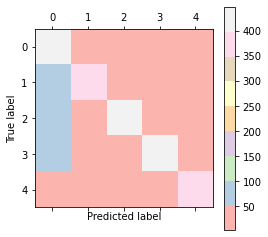

[[0.1792 0.0028 0.0104 0.0044 0.0056]
 [0.0212 0.1536 0.0108 0.0044 0.0032]
 [0.0244 0.0036 0.1724 0.0064 0.0032]
 [0.0244 0.0044 0.0088 0.164  0.004 ]
 [0.02   0.002  0.0104 0.0012 0.1552]]

Confusion Matrix (normalised)


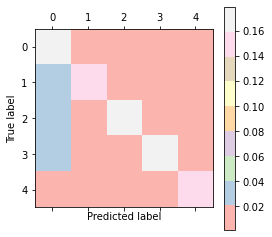

Classification report

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       506
           1       0.92      0.80      0.85       483
           2       0.81      0.82      0.82       525
           3       0.91      0.80      0.85       514
           4       0.91      0.82      0.86       472

    accuracy                           0.82      2500
   macro avg       0.84      0.82      0.83      2500
weighted avg       0.84      0.82      0.83      2500

Accuracy: 0.8244


In [22]:
import sklearn.metrics as metrics
# displaying confusion matrix
cm = confusion_matrix(test_generator.classes, predicted_class_indices)
cmap = plt.get_cmap('Pastel1')
print(cm)
plt.matshow(cm)
plt.imshow(cm, cmap=cmap)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()


cm2 = confusion_matrix(test_generator.classes, predicted_class_indices, normalize='all')

print(cm2)
plt.matshow(cm2)
plt.imshow(cm2, cmap=cmap)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix (normalised)')
plt.show()

print('Classification report\n')
print(classification_report(test_generator.classes, predicted_class_indices))
print('Accuracy:', accuracy_score(test_generator.classes, predicted_class_indices))